# Chatbot
- reperence https://python.langchain.com/v0.2/docs/tutorials/chatbot/

## Quickstart


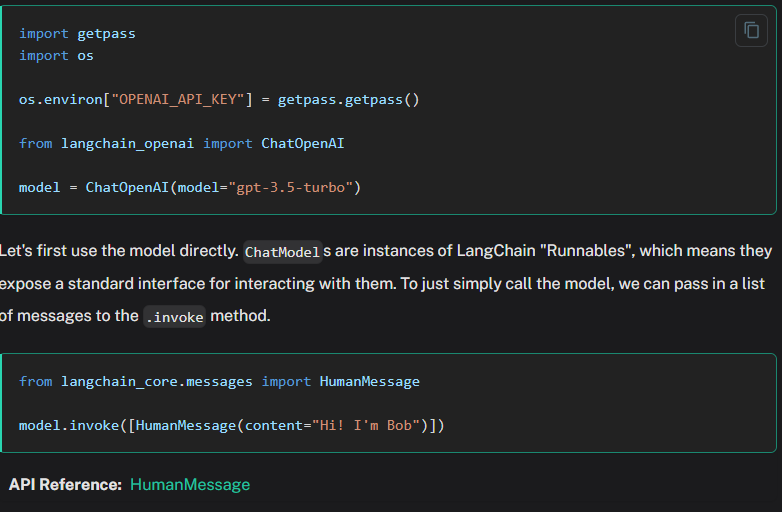

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv


In [2]:
load_dotenv()


True

In [3]:
model = ChatOpenAI(model = 'gpt-4.1-nano')
model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000023AF4D01030>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000023AF4D03D90>, root_client=<openai.OpenAI object at 0x0000023AF4BDE740>, root_async_client=<openai.AsyncOpenAI object at 0x0000023AF4D010F0>, model_name='gpt-4.1-nano', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [4]:
ai_message = model.invoke([HumanMessage(content="Hi! I'm Bob")])

In [5]:
ai_message

AIMessage(content='Hello, Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 11, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPM48Gw55ru2VWBWtf4PsQaAqKdZ', 'finish_reason': 'stop', 'logprobs': None}, id='run-612c33b4-8121-4d1a-9c23-56e0aa6f186c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 11, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
ai_message.content

'Hello, Bob! How can I assist you today?'

In [7]:
ai_message_02 = model.invoke('what is my name?')
ai_message_02

AIMessage(content="I'm sorry, but I don't have access to your name. How can Iassist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 12, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPM5aO12KZWHnZNycAEtlsQnVFiF', 'finish_reason': 'stop', 'logprobs': None}, id='run-fbe8cf99-418d-4ba2-a29c-59a269cd36aa-0', usage_metadata={'input_tokens': 12, 'output_tokens': 19, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
ai_message_03 = model.invoke([HumanMessage('what is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I don't know your name. Would you like to tell me?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPM5QtFPjLzyDWjQsdKCbWXJyPJ0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c1c368cd-8034-4e47-9fdd-2bf0304c44bf-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_core.messages import AIMessage

ai_message04 = model.invoke(
    [
        HumanMessage(content='HI! I am Bob'),
        AIMessage(content='Hello Bob! How can I assist you today?'),
        HumanMessage(content='What is my name')
    ]
)
ai_message04

AIMessage(content='Your name is Bob!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 34, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_9970320b4a', 'id': 'chatcmpl-BcPM6qvHj4uwnXLUhSUoxrZfUsEnu', 'finish_reason': 'stop', 'logprobs': None}, id='run-efed6b48-c07c-4f73-bdb2-9f231bfe1121-0', usage_metadata={'input_tokens': 34, 'output_tokens': 5, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
ai_message04.content

'Your name is Bob!'

## Message History  

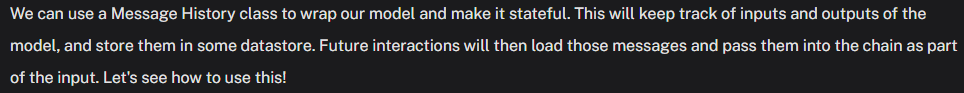

In [11]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id:str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [12]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config =  config,
)

response.content

'Hello, Bob! How can I assist you today?'

In [13]:
response= with_message_history.invoke(
    [HumanMessage(content='what is my name>')],
    config = config,
)

response.content

'Your name is Bob. How can I help you today?'

### [문제] 대화 이력(message history)

In [14]:
## 대화이력
get_session_history('abc2')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcPM6vYDkbIHo22N1Q6pwOy0eBkXO', 'finish_reason': 'stop', 'logprobs': None}, id='run-1a5e0236-0e4b-40b8-976e-1e096d8e1e53-0', usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='what is my name>', additional_kwargs={}, respo

In [15]:
get_session_history('abc2').messages

[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcPM6vYDkbIHo22N1Q6pwOy0eBkXO', 'finish_reason': 'stop', 'logprobs': None}, id='run-1a5e0236-0e4b-40b8-976e-1e096d8e1e53-0', usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='what is my name>', additional_kwargs={}, response_metadata={}),
 AIMessage(conte

In [16]:
## 첫 번째 질문(Humanmessage) 출력
type(get_session_history('abc2').messages)

list

In [17]:
get_session_history('abc2').messages[0]

HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={})

In [18]:
get_session_history('abc2').messages[0].content

'Hi! I am Bob'

In [19]:
config = {'configurable': {'session_id': 'abc3'}}

response = with_message_history.invoke(
    [HumanMessage(content='whst is my name?')],
    config=config,
)

response.content

"I'm sorry, but I don't have access to your name. How can I assist you today?"

In [20]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='what is my name?')],
    config=config,
)

response.content

'Your name is Bob.'

In [21]:
len(store)

2

In [22]:
store.keys()

dict_keys(['abc2', 'abc3'])

In [23]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[HumanMessage(content='whst is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, but I don't have access to your name. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcPM80TcEEWM04vCmRNMZrwfH4Cae', 'finish_reason': 'stop', 'logprobs': None}, id='run-dce2aff8-ed05-41b0-bd97-d81e6498f4e7-0', usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [24]:
for message in get_session_history('abc3').messages:
    print(message.content)

whst is my name?
I'm sorry, but I don't have access to your name. How can I assist you today?


## Prompt template

In [25]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer all questions to the best of your ability.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

In [26]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm bob")]})

response.content

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [27]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

In [28]:
config = {"configurable": {"session_id": "abc5"}}

In [29]:
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Jim")],
    config=config,
)

response.content

'Hi Jim! Nice to meet you. How can I assist you today?'

In [30]:
response = with_message_history.invoke(
    [HumanMessage(content="what's my name?")],
    config=config,
)

response.content

'Your name is Jim. How can I help you today?'

In [31]:
response

AIMessage(content='Your name is Jim. How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 59, 'total_tokens': 71, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPMBVcpVqjmiM4JdpZgI56ru5oJn', 'finish_reason': 'stop', 'logprobs': None}, id='run-972d6b06-33a2-429e-8437-54294b1e61b3-0', usage_metadata={'input_tokens': 59, 'output_tokens': 12, 'total_tokens': 71, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [32]:
len(store)


3

In [33]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5'])

In [34]:
get_session_history('abc5')


InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={}), AIMessage(content='Hi Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_9970320b4a', 'id': 'chatcmpl-BcPMAJ89sMsGmnWywcalLwwW3W1eD', 'finish_reason': 'stop', 'logprobs': None}, id='run-dd049b6e-2659-46c9-85b0-db4a89f3eebe-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="what's my name?", additional_kwar

In [35]:
get_session_history('abc5').messages[0]

HumanMessage(content="Hi! I'm Jim", additional_kwargs={}, response_metadata={})

In [36]:
get_session_history('abc5').messages[0].type

'human'

In [37]:
get_session_history('abc5').messages[0].type.upper()

'HUMAN'

In [38]:
response = with_message_history.invoke(
    [HumanMessage(content="what's my name?")],
    config= config,
)
response.content

"Your name is Jim. Let me know if there's anything else you'd like to talk about!"

In [39]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]:{message.content}')
    # print(message.type.upper(), message.content)

[HUMAN]:Hi! I'm Jim
[AI]:Hi Jim! Nice to meet you. How can I assist you today?
[HUMAN]:what's my name?
[AI]:Your name is Jim. How can I help you today?
[HUMAN]:what's my name?
[AI]:Your name is Jim. Let me know if there's anything else you'd like to talk about!


In [40]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "you aer a helpful assiastant. Answer all questions to the best of your abillty in {language}.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
chain = prompt | model

In [41]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

- Let's now wrap this more complicated chain in a Message History class. This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [42]:
with_message_history = RunnableWithMessageHistory(
chain,
get_session_history,
input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc11"}}

response = with_message_history.invoke(
    {"messages": [ HumanMessage(content="hi! I'm todd")], "language": "spanish"},
    config=config,
)
response.content

'¡Hola, Todd! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

In [43]:
len(store)

4

In [44]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Encantado de conocerte. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 37, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPMDN89nD1JzgIaVrhNQk0sudcO6', 'finish_reason': 'stop', 'logprobs': None}, id='run-ded24b22-7053-4de7-ad56-cd4728eb5a6b-0', usage_metadata={'input_tokens': 37, 'output_tokens': 19, 'total_tokens': 56, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [45]:
get_session_history('abc11').messages

[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}),
 AIMessage(content='¡Hola, Todd! Encantado de conocerte. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 37, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPMDN89nD1JzgIaVrhNQk0sudcO6', 'finish_reason': 'stop', 'logprobs': None}, id='run-ded24b22-7053-4de7-ad56-cd4728eb5a6b-0', usage_metadata={'input_tokens': 37, 'output_tokens': 19, 'total_tokens': 56, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [46]:
response = with_message_history.invoke(
    {'messages': [HumanMessage(content="whats my name?")], "language": "Spanish"},
    config=config,
)

response.content

'Tu nombre es Todd.'

In [47]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Encantado de conocerte. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 37, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcPMDN89nD1JzgIaVrhNQk0sudcO6', 'finish_reason': 'stop', 'logprobs': None}, id='run-ded24b22-7053-4de7-ad56-cd4728eb5a6b-0', usage_metadata={'input_tokens': 37, 'output_tokens': 19, 'total_tokens': 56, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='whats my name?', addi

## Managing Conversation History

In [54]:
from langchain_core.messages import SystemMessage, trim_messages

model = ChatOpenAI(model='gpt-3.5-turbo')

trimmer = trim_messages(
    max_tokens=65,
    strategy = 'last',
    token_counter=model,
    include_system=True,
    allow_partial=True,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trim_messages = trimmer.invoke(messages)
trim_messages

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [55]:
model.get_num_tokens_from_messages(trim_messages)

53

In [ ]:
from operator import itemgetter

dc = {"messages": messages +[HumanMessage(content="what's my name?")],}

In [50]:
from operator import itemgetter

from langchain_core.runnables import RunnablePassthrough

chain = (
    RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)
    | prompt
    | model
)

response = chain.invoke(
    {"messages": messages + [HumanMessage(content="what's my name")],
    "language" : "English",}
)
response.content

"I'm sorry, I don't have access to personal information like your name. Is there anything else I can help you with?"

In [60]:
messages + [HumanMessage(content="what's my name")]

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name", additional_kwargs={}, response_metadata={})]

In [56]:

response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what math problem did i ask")],
        "language": "English",
    }
)
response.content

"You didn't ask a math problem yet. If you have one, feel free to ask!"

In [66]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5', 'abc11', 'abc20'])

In [59]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)
config = {"configurable": {"session_id": "abc20"}}

In [61]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)
config = {"configurable": {"session_id": "abc20"}}

In [70]:
response = with_message_history.invoke({
    "messages": messages + [HumanMessage(content="whats my name?")],
    "language": "korean",
    },
    config=config,
)
response.content

"I'm sorry, I don't know your name as we are communicating through text."

In [68]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5', 'abc11', 'abc20'])

In [69]:
get_session_history('abc20')

InMemoryChatMessageHistory(messages=[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}), HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}), AIMessage(content='hi!', additional_kwargs={}, response_metadata={}), HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}), AIMessage(content='nice', additional_kwargs={}, response_metadata={}), HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}), AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}), HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}), AIMessage(content='yes!', additional_kwargs={}, response_metadata={}), HumanMessage(content='whats my name?', additional_kwargs={}, response_metadata={}), AIMessage(cont

In [71]:
for message in get_session_history('abc20').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[SYSTEM]: you're a good assistant
[HUMAN]: hi! I'm bob
[AI]: hi!
[HUMAN]: I like vanilla ice cream
[AI]: nice
[HUMAN]: whats 2 + 2
[AI]: 4
[HUMAN]: thanks
[AI]: no problem!
[HUMAN]: having fun?
[AI]: yes!
[HUMAN]: whats my name?
[AI]: I'm sorry, I do not have access to personal information like your name.
[SYSTEM]: you're a good assistant
[HUMAN]: hi! I'm bob
[AI]: hi!
[HUMAN]: I like vanilla ice cream
[AI]: nice
[HUMAN]: whats 2 + 2
[AI]: 4
[HUMAN]: thanks
[AI]: no problem!
[HUMAN]: having fun?
[AI]: yes!
[HUMAN]: whats my name?
[AI]: I'm sorry, I don't have access to your personal information.
[SYSTEM]: you're a good assistant
[HUMAN]: hi! I'm bob
[AI]: hi!
[HUMAN]: I like vanilla ice cream
[AI]: nice
[HUMAN]: whats 2 + 2
[AI]: 4
[HUMAN]: thanks
[AI]: no problem!
[HUMAN]: having fun?
[AI]: yes!
[HUMAN]: whats my name?
[AI]: I'm sorry, I don't know your name as we are communicating through text.


In [75]:
response = with_message_history.invoke(
    {
        "messages": [HumanMessage(content="what math problem did i ask?")],
        "language": "한국어",
    },
    config=config,
)
response.content

'당신은 수학 문제에 대해 질문하지 않았습니다. 어떤 수학 문제를 도와 드릴까요?'